## Explore metadata for a curated dataset

This notebook shows how to connect to a curated TDM dataset and explore the metadata.

In [60]:
import pandas as pd

from tdm_client import Dataset

Initialize a TDM dataset object with the dataset ID provided by the Digital Scholars Workbench or in the email you received after curating your dataset.

In [61]:
dset = Dataset('a517ef1f-0794-48e4-bea1-ac4fb8b312b4')

Find total number of documents in the dataset. 

In [62]:
len(dset)

1000

After initializing the `Dataset`, the documents in the dataset are downloaded in the background.

A list of all of the items in the Dataset is available.

In [63]:
dset.items[:5]

['http://www.jstor.org/stable/i40075057',
 'http://www.jstor.org/stable/i40103856',
 'http://www.jstor.org/stable/i40075051',
 'http://www.jstor.org/stable/i40075048',
 'http://www.jstor.org/stable/i40075029']

The document metadata can be retrieved by calling the `get_metadata` method. The metadata is a list of Python dictionaries containing attributes for each document.

In [64]:
metadata = dset.get_metadata()

Print the metadata for the first document in the dataset.

In [65]:
print(metadata[0])

{'id': 'http://www.jstor.org/stable/i23675740', 'journalTitle': 'The Shakespeare Association Bulletin', 'pageCount': 29, 'provider': 'jstor', 'title': 'The Shakespeare Association Bulletin volume 3 issue 2', 'wordCount': 22502, 'yearPublished': 1928}


Convert the metadata to a Pandas dataframe to take advantage of its plotting and manipulation functions.

In [66]:
df = pd.DataFrame(metadata)

Print the first 10 rows of the dataframe

In [67]:
df.head()

,id,journalTitle,pageCount,provider,title,wordCount,yearPublished
0,http://www.jstor.org/stable/i23675740,The Shakespeare Association Bulletin,29,jstor,The Shakespeare Association Bulletin volume 3 ...,22502.0,1928
1,http://www.jstor.org/stable/i247053,Asian Theatre Journal,41,jstor,Asian Theatre Journal volume 5 issue 1,17718.0,1988
2,http://www.jstor.org/stable/i23917916,Literature and Theology,105,jstor,Literature and Theology volume 12 issue 3,59158.0,1998
3,http://www.jstor.org/stable/i338524,Shakespeare Quarterly,198,jstor,Shakespeare Quarterly volume 29 issue 2,147913.0,1978
4,http://www.jstor.org/stable/i338476,Shakespeare Quarterly,71,jstor,Shakespeare Quarterly volume 17 issue 2,35733.0,1966


Find the year range of documents in this dataset

In [68]:
print('{} to {}'.format(df['yearPublished'].min(), df['yearPublished'].max()))

1902 to 2019


Now do some preliminary analysis. Let's say you want to plot the number of volumes by decade in the sample set. 

Since `decade` isn't a value in our dataset, we need to add it to the dataframe. This can be done wiht the following step.

In [69]:
df['decade'] = df['yearPublished'] - ( df['yearPublished'] % 10)

Print the first 10 rows of the dataframe again to see how the column was applied.

In [70]:
df.head()

,id,journalTitle,pageCount,provider,title,wordCount,yearPublished,decade
0,http://www.jstor.org/stable/i23675740,The Shakespeare Association Bulletin,29,jstor,The Shakespeare Association Bulletin volume 3 ...,22502.0,1928,1920
1,http://www.jstor.org/stable/i247053,Asian Theatre Journal,41,jstor,Asian Theatre Journal volume 5 issue 1,17718.0,1988,1980
2,http://www.jstor.org/stable/i23917916,Literature and Theology,105,jstor,Literature and Theology volume 12 issue 3,59158.0,1998,1990
3,http://www.jstor.org/stable/i338524,Shakespeare Quarterly,198,jstor,Shakespeare Quarterly volume 29 issue 2,147913.0,1978,1970
4,http://www.jstor.org/stable/i338476,Shakespeare Quarterly,71,jstor,Shakespeare Quarterly volume 17 issue 2,35733.0,1966,1960


Now use the built in plotting tools of Pandas to plot the number of issues from each provider by decade.

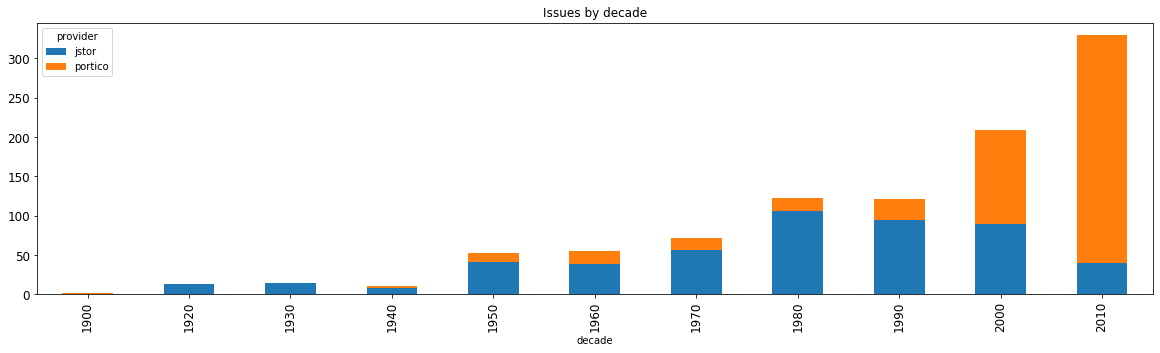

In [71]:
df.groupby(['decade', 'provider'])['id'].agg('count').unstack()\
    .plot.bar(title='Issues by decade', figsize=(20, 5), fontsize=12, stacked=True);

And do the same for the total number of pages.

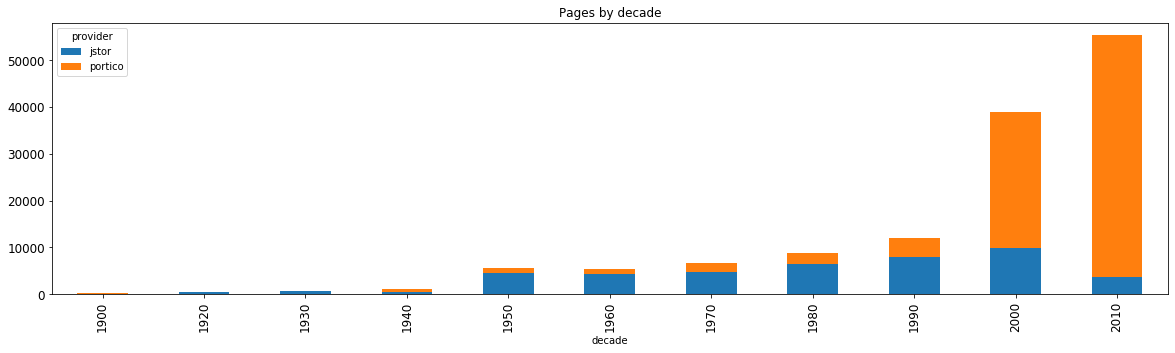

In [72]:
df.groupby(['decade', 'provider'])['pageCount'].agg('sum').unstack()\
    .plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12, stacked=True);